In [63]:
import csv
import pandas as pd

In [64]:
# Read the CSV file into a DataFrame
df = pd.read_csv('main_files\Draft1.csv')

# Group the data by 'Name' and filter the rows based on the conditions
filtered_df = df.groupby('Name').apply(lambda x: x[x['Distance'].isin(['5k', '10k', '10 mile'])].tail(3) if len(x) > 3 else x).reset_index(drop=True)
# Display the filtered DataFrame
print(filtered_df)

               Name Distance     Time
0      Aaron Benney       5k    16:23
1      Aaron Benney      10k    33:35
2      Aaron Benney  10 mile    55:08
3      Aaron Burley       5k    22:04
4      Aaron Burley      10k    46:35
...             ...      ...      ...
7714  🌱 Luc Jolly 🌱      10k    26:19
7715  🌱 Luc Jolly 🌱  10 mile    44:25
7716  💕 Emma Neal 💕       5k    22:44
7717  💕 Emma Neal 💕      10k    48:32
7718  💕 Emma Neal 💕  10 mile  1:18:52

[7719 rows x 3 columns]


In [65]:
name_ = filtered_df['Name'].value_counts()
name_

Name
Aaron Benney     3
Oliver Carey     3
Neil Richards    3
Neil Ringrose    3
Neil Rose        3
                ..
Helen Lovell     3
Helen Newman     3
Helen Symonds    3
Helen Twomey     3
💕 Emma Neal 💕    3
Name: count, Length: 2573, dtype: int64

In [66]:
for name, count in name_.items():
    if count != 3:
        print(f'The count for {name} is off')

In [67]:
# Read the CSV file into a DataFrame
df1 = pd.read_csv('main_files\Draft2.csv')

# Remove the second occurrence of a row with each name into a separate DataFrame
second_occurrences = df1.drop_duplicates(subset='Name', keep='first', ignore_index=True).copy()

# Display the separate DataFrame

yearly_activities = second_occurrences
yearly_activities

,Name,Number of Activities,Distance Ran,Time Ran
0,Jack Rowe,565,"4,414.5 mi",493h 45m
1,Jake Smith,171,"1,157.2 mi",118h 25m
2,Andy Vernon,48,333.7 mi,37h 7m
3,Joshua Grace,419,"2,752.4 mi",308h 11m
4,Dan Jarvis,193,992.2 mi,113h 16m
...,...,...,...,...
2568,Jordane Bates,108,605.9 mi,95h 19m
2569,Mike Sharpe,64,319.4 mi,48h 48m
2570,Kathryn Bailey 🐝,82,424.7 mi,69h 56m
2571,David Friend,124,619.3 mi,130h 31m


In [68]:
first_occurrences = df1.drop_duplicates(subset='Name', keep='last', ignore_index=True).copy()
total_activities = first_occurrences
total_activities

,Name,Number of Activities,Distance Ran,Time Ran
0,Jack Rowe,"2,144","16,430.7 mi",1832h 45m
1,Andy Vernon,"1,526","10,204.3 mi",1126h 25m
2,Joshua Grace,"2,758","16,859.0 mi",1872h 28m
3,Dan Jarvis,"4,037","19,301.4 mi",2133h 24m
4,Charlie Davis,"3,138","15,165.9 mi",1689h 21m
...,...,...,...,...
2568,Jordane Bates,462,"2,265.5 mi",365h 11m
2569,Mike Sharpe,259,"1,371.5 mi",208h 13m
2570,Kathryn Bailey 🐝,900,"4,941.1 mi",964h 3m
2571,David Friend,"1,113","6,315.6 mi",1131h 9m


In [69]:
total_activities.reset_index(drop=True)
total_activities

,Name,Number of Activities,Distance Ran,Time Ran
0,Jack Rowe,"2,144","16,430.7 mi",1832h 45m
1,Andy Vernon,"1,526","10,204.3 mi",1126h 25m
2,Joshua Grace,"2,758","16,859.0 mi",1872h 28m
3,Dan Jarvis,"4,037","19,301.4 mi",2133h 24m
4,Charlie Davis,"3,138","15,165.9 mi",1689h 21m
...,...,...,...,...
2568,Jordane Bates,462,"2,265.5 mi",365h 11m
2569,Mike Sharpe,259,"1,371.5 mi",208h 13m
2570,Kathryn Bailey 🐝,900,"4,941.1 mi",964h 3m
2571,David Friend,"1,113","6,315.6 mi",1131h 9m


In [70]:
yearly_activities['Number of Activities'] = yearly_activities['Number of Activities'].astype(int)

In [71]:
import matplotlib.pyplot as plt

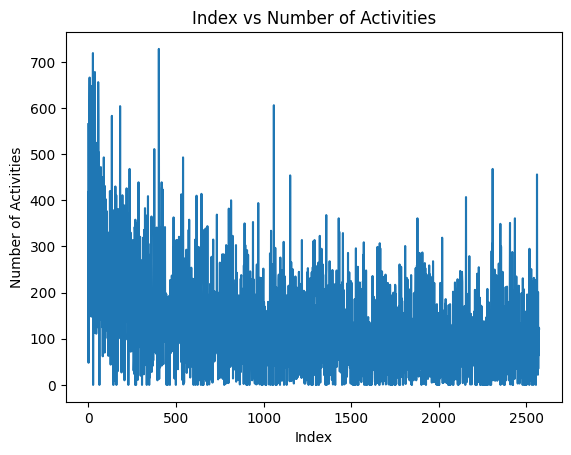

In [72]:
yearly_activities['Number of Activities'].plot()
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Number of Activities')
plt.title('Index vs Number of Activities')

# Display the plot
plt.show()

In [73]:
yearly_activities['Distance Ran'] = yearly_activities['Distance Ran'].str.replace(' mi', '')

In [74]:
yearly_activities['Distance Ran'] = yearly_activities['Distance Ran'].str.replace(',', '')

In [75]:
yearly_activities['Distance Ran'] = yearly_activities['Distance Ran'].astype(float)

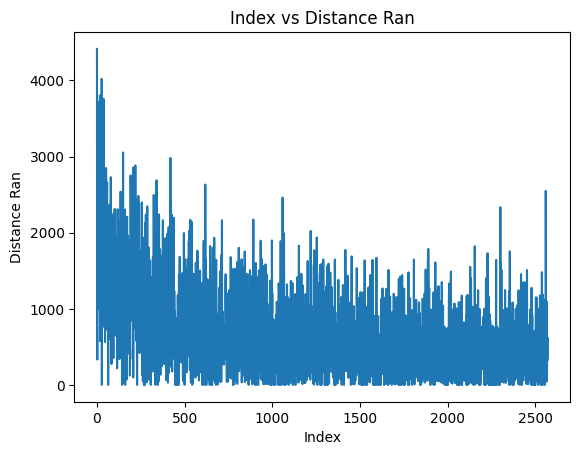

In [76]:
yearly_activities['Distance Ran'].plot()
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Distance Ran')
plt.title('Index vs Distance Ran')

# Display the plot
plt.show()

In [77]:
# Convert the 'Time Ran' column to total minutes integer
yearly_activities['Time Ran'] = yearly_activities['Time Ran'].apply(lambda x: sum(int(i[:-1]) * (60 if i[-1] == 'h' else 1) for i in x.split()))

# Display the updated DataFrame
print(yearly_activities)

                  Name  Number of Activities  Distance Ran  Time Ran
0            Jack Rowe                   565        4414.5     29625
1           Jake Smith                   171        1157.2      7105
2          Andy Vernon                    48         333.7      2227
3         Joshua Grace                   419        2752.4     18491
4           Dan Jarvis                   193         992.2      6796
...                ...                   ...           ...       ...
2568     Jordane Bates                   108         605.9      5719
2569       Mike Sharpe                    64         319.4      2928
2570  Kathryn Bailey 🐝                    82         424.7      4196
2571      David Friend                   124         619.3      7831
2572   Jason Wilkinson                   122         543.0      5412

[2573 rows x 4 columns]


In [78]:
yearly_activities.drop(yearly_activities.loc[yearly_activities['Number of Activities'] == 0].index, inplace=True)
yearly_activities.sort_values(by='Number of Activities')

,Name,Number of Activities,Distance Ran,Time Ran
865,lee Kelly 🐐,1,2.0,52
2187,kieran Jones,1,0.4,45
2082,Tyler Daly,1,6.2,66
1460,Karen Eyre,1,11.2,121
1617,George Butt,1,2.7,52
...,...,...,...,...
8,George Beardmore,666,3522.9,24006
33,Andy Winterbottom,673,3544.7,25523
38,Kurt Taylor,678,3758.4,25609
27,Ollie Garrod,719,4021.6,30524


In [79]:
yearly_activities['Finishing Position'] = yearly_activities.index + 1

In [80]:
# Calculate the correlation between 'Distance Ran' and the index number
correlation = yearly_activities['Number of Activities'].astype(float).corr(yearly_activities['Finishing Position'].astype(float))

# Print the correlation
print(f"The correlation between 'Number of Activities' and the index number is: {correlation}")

The correlation between 'Number of Activities' and the index number is: -0.41695162891430876


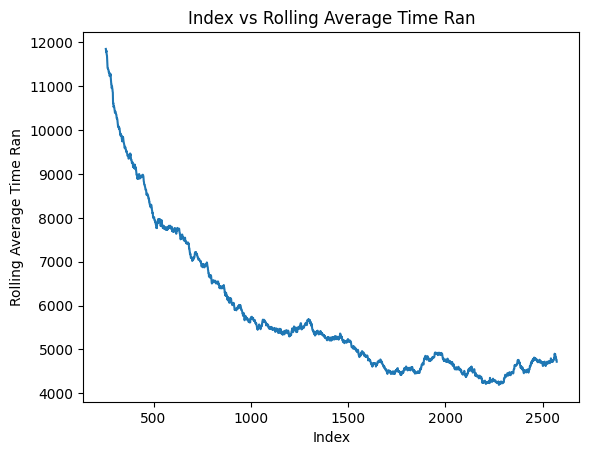

In [81]:
# Calculate the rolling average of 'Time Ran' with a window size of 10
rolling_average = yearly_activities['Time Ran'].rolling(window=250).mean()

# Plot the rolling average
rolling_average.plot()
plt.xlabel('Index')
plt.ylabel('Rolling Average Time Ran')
plt.title('Index vs Rolling Average Time Ran')
plt.show()

# Display the plot

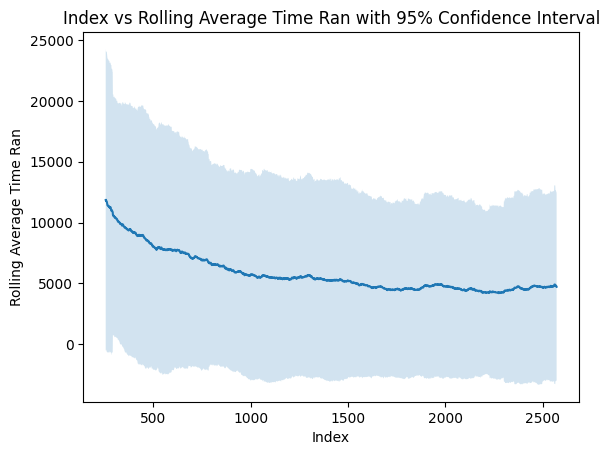

In [82]:
rolling_average = yearly_activities['Time Ran'].rolling(window=250).mean()
std_dev = yearly_activities['Time Ran'].rolling(window=250).std()

upper_bound = rolling_average + 1.96 * std_dev  # 95% confidence interval
lower_bound = rolling_average - 1.96 * std_dev  # 95% confidence interval

# Plot the rolling average with confidence interval
plt.plot(rolling_average.index, rolling_average, label='Rolling Average Time Ran')
plt.fill_between(rolling_average.index, lower_bound, upper_bound, alpha=0.2)
plt.xlabel('Index')
plt.ylabel('Rolling Average Time Ran')
plt.title('Index vs Rolling Average Time Ran with 95% Confidence Interval')
plt.show()

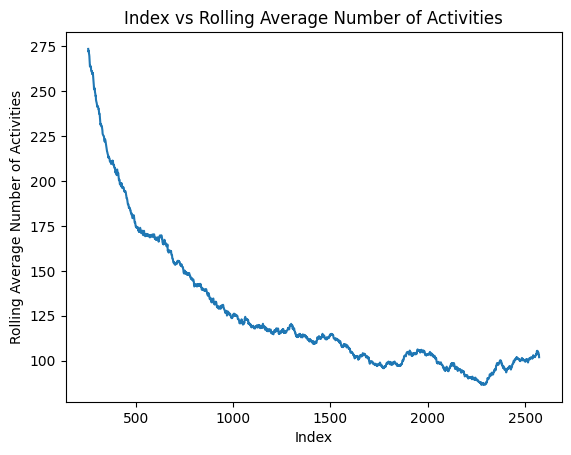

In [83]:
# Calculate the rolling average of 'Time Ran' with a window size of 10
rolling_average = yearly_activities['Number of Activities'].rolling(window=250).mean()

# Plot the rolling average
rolling_average.plot()
plt.xlabel('Index')
plt.ylabel('Rolling Average Number of Activities')
plt.title('Index vs Rolling Average Number of Activities')
plt.show()


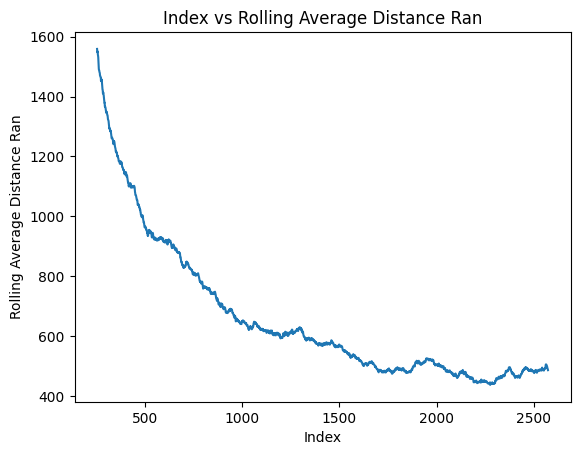

In [84]:
# Calculate the rolling average of 'Time Ran' with a window size of 10
rolling_average = yearly_activities['Distance Ran'].rolling(window=250).mean()

# Plot the rolling average
rolling_average.plot()
plt.xlabel('Index')
plt.ylabel('Rolling Average Distance Ran')
plt.title('Index vs Rolling Average Distance Ran')
plt.show()


In [85]:
yearly_activities['Time per week'] = yearly_activities['Time Ran']/52

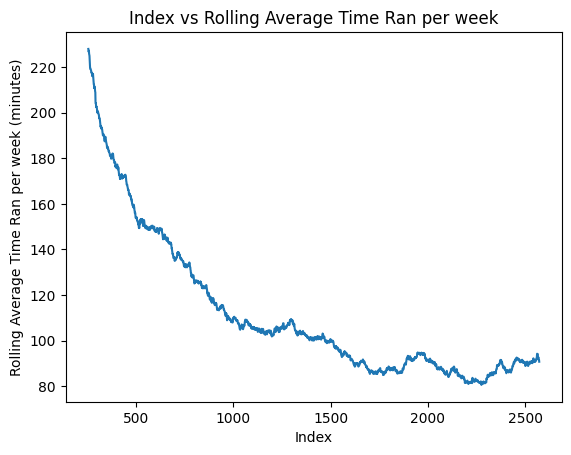

In [86]:
# Calculate the rolling average of 'Time Ran' with a window size of 10
rolling_average = yearly_activities['Time per week'].rolling(window=250).mean()

# Plot the rolling average
rolling_average.plot()
plt.xlabel('Index')
plt.ylabel('Rolling Average Time Ran per week (minutes)')
plt.title('Index vs Rolling Average Time Ran per week')
plt.show()

# Display the plot

In [87]:
# filtered_df[filtered_df['Time'] == '39s']
filtered_df.drop(filtered_df.loc[filtered_df['Name'] == 'Terry Hardy'].index, inplace=True)

In [88]:
import pandas as pd

# Convert time to seconds in a new column
filtered_df['Time in Seconds'] = filtered_df['Time'].apply(lambda x: sum(int(i) * 60**index for index, i in enumerate(reversed(x.split(':')))))
filtered_df

,Name,Distance,Time,Time in Seconds
0,Aaron Benney,5k,16:23,983
1,Aaron Benney,10k,33:35,2015
2,Aaron Benney,10 mile,55:08,3308
3,Aaron Burley,5k,22:04,1324
4,Aaron Burley,10k,46:35,2795
...,...,...,...,...
7714,🌱 Luc Jolly 🌱,10k,26:19,1579
7715,🌱 Luc Jolly 🌱,10 mile,44:25,2665
7716,💕 Emma Neal 💕,5k,22:44,1364
7717,💕 Emma Neal 💕,10k,48:32,2912


In [89]:
merged_df = pd.merge(filtered_df, yearly_activities, on='Name')


In [90]:
# Sort the DataFrame by time in seconds
sorted_df = merged_df[merged_df['Distance'] == '10 mile'].sort_values(by='Time in Seconds')
sorted_df

,Name,Distance,Time,Time in Seconds,Number of Activities,Distance Ran,Time Ran,Finishing Position,Time per week
6674,Tess Howlett,10 mile,8:48,528,96,329.5,3176,2263,61.076923
4451,Matt Suter,10 mile,13:19,799,196,834.2,6532,146,125.615385
806,Brian Sansom,10 mile,19:34,1174,73,295.3,2511,484,48.288462
3443,Justin Olley (LRR / Sotonia CC),10 mile,33:59,2039,76,286.0,2666,1601,51.269231
1559,Dave Kittle,10 mile,38:25,2305,147,953.3,8972,1463,172.538462
...,...,...,...,...,...,...,...,...,...
302,Andrew Bradley,10 mile,1:28:31,5311,66,230.4,2347,2015,45.134615
3719,Leanne Rule,10 mile,1:32:05,5525,47,178.5,1645,1805,31.634615
1481,Darren Brook,10 mile,1:36:07,5767,64,255.6,2192,2259,42.153846
4637,Michael dearing,10 mile,1:38:06,5886,14,80.7,821,1077,15.788462


In [91]:
sorted_df['Time in Minutes'] = sorted_df['Time in Seconds']/60

In [92]:
from scipy.stats import gaussian_kde
import numpy as np

In [93]:
sorted_df.drop(sorted_df.loc[sorted_df['Name'] == 'Michael dearing'].index, inplace=True)

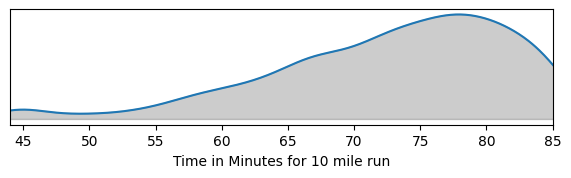

In [94]:
# Create a kernel density estimate (KDE) plot using scipy and matplotlib
data_10mile = sorted_df['Time in Minutes']
kde = gaussian_kde(data_10mile)
# kde.set_bandwidth(bw_method=kde.factor * 3.)  # Adjust bandwidth for smoother plot
x = np.linspace(min(data_10mile), max(data_10mile), 1000)
plt.figure(figsize=(7,1.5))
plt.plot(x, kde(x), label='KDE')
plt.fill_between(x, 0, kde(x), alpha=0.2, color='black')
plt.xlabel('Time in Minutes for 10 mile run')
plt.yticks([])
plt.xlim(44,85)
plt.show()

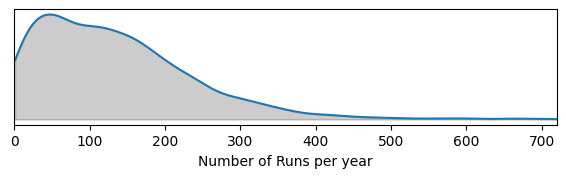

In [95]:
# Create a kernel density estimate (KDE) plot using scipy and matplotlib
data_10mile = sorted_df['Number of Activities']
kde = gaussian_kde(data_10mile)
# kde.set_bandwidth(bw_method=kde.factor * 3.)  # Adjust bandwidth for smoother plot
x = np.linspace(min(data_10mile), max(data_10mile), 1000)
plt.figure(figsize=(7,1.5))
plt.plot(x, kde(x), label='KDE')
plt.fill_between(x, 0, kde(x), alpha=0.2, color='black')
plt.xlabel('Number of Runs per year')
plt.yticks([])
plt.xlim(0,720)
plt.show()

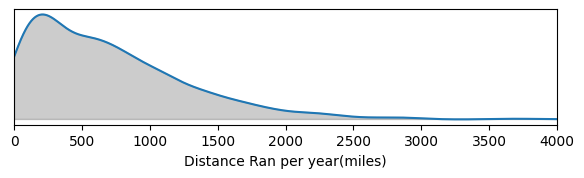

In [96]:
# Create a kernel density estimate (KDE) plot using scipy and matplotlib
data_10mile = sorted_df['Distance Ran']
kde = gaussian_kde(data_10mile)
# kde.set_bandwidth(bw_method=kde.factor * 3.)  # Adjust bandwidth for smoother plot
x = np.linspace(min(data_10mile), max(data_10mile), 1000)
plt.figure(figsize=(7,1.5))
plt.plot(x, kde(x), label='KDE')
plt.fill_between(x, 0, kde(x), alpha=0.2, color='black')
plt.xlabel('Distance Ran per year(miles)')
plt.yticks([])
plt.xlim(0,4000)
plt.show()

In [97]:
sorted_df[sorted_df['Distance Ran']>3000]

,Name,Distance,Time,Time in Seconds,Number of Activities,Distance Ran,Time Ran,Finishing Position,Time per week,Time in Minutes
2672,Jack Rowe,10 mile,45:14,2714,565,4414.5,29625,1,569.711538,45.233333
596,Ben Alcock,10 mile,48:53,2933,541,3718.0,26390,7,507.500000,48.883333
209,Alex Pointon,10 mile,48:57,2937,580,3693.1,26203,8,503.903846,48.950000
2195,George Beardmore,10 mile,49:17,2957,666,3522.9,24006,9,461.653846,49.283333
3665,Kurt Taylor,10 mile,49:41,2981,678,3758.4,25609,39,492.480769,49.683333
4253,Marshall Smith,10 mile,50:08,3008,552,3804.1,25225,18,485.096154,50.133333
5063,Ollie Garrod,10 mile,50:22,3022,719,4021.6,30524,28,587.000000,50.366667
473,Andy Winterbottom,10 mile,53:33,3213,673,3544.7,25523,34,490.826923,53.550000
4385,Matt Frost,10 mile,1:00:20,3620,365,3053.5,23701,150,455.788462,60.333333


In [98]:
sorted_df.drop(sorted_df.loc[sorted_df['Name'] == 'Matt Suter'].index, inplace=True)

In [99]:
sorted_df.drop(sorted_df.loc[sorted_df['Name'] == 'Brian Sansom'].index, inplace=True)

In [100]:
sorted_df.drop(sorted_df.loc[sorted_df['Time per week'] == 0].index, inplace=True)

In [101]:
sorted_df[sorted_df['Number of Activities']>600]

,Name,Distance,Time,Time in Seconds,Number of Activities,Distance Ran,Time Ran,Finishing Position,Time per week,Time in Minutes
2195,George Beardmore,10 mile,49:17,2957,666,3522.9,24006,9,461.653846,49.283333
3665,Kurt Taylor,10 mile,49:41,2981,678,3758.4,25609,39,492.480769,49.683333
5063,Ollie Garrod,10 mile,50:22,3022,719,4021.6,30524,28,587.000000,50.366667
191,Alex Matthews,10 mile,52:56,3176,648,2303.1,16890,24,324.807692,52.933333
473,Andy Winterbottom,10 mile,53:33,3213,673,3544.7,25523,34,490.826923,53.550000
2123,Gary O'Brien,10 mile,55:44,3344,656,2403.9,19115,58,367.596154,55.733333
137,Alan Wilcox,10 mile,58:37,3517,728,1986.6,19139,404,368.057692,58.616667
2708,Jake Reynolds,10 mile,1:01:31,3691,604,1897.5,15362,183,295.423077,61.516667
3011,Jeffrey Streeter,10 mile,1:14:56,4496,606,2461.9,21031,1060,404.442308,74.933333


In [102]:
import numpy as np

In [103]:
sorted_df

,Name,Distance,Time,Time in Seconds,Number of Activities,Distance Ran,Time Ran,Finishing Position,Time per week,Time in Minutes
6674,Tess Howlett,10 mile,8:48,528,96,329.5,3176,2263,61.076923,8.800000
3443,Justin Olley (LRR / Sotonia CC),10 mile,33:59,2039,76,286.0,2666,1601,51.269231,33.983333
1559,Dave Kittle,10 mile,38:25,2305,147,953.3,8972,1463,172.538462,38.416667
3296,Jon Lawrence,10 mile,44:18,2658,323,1593.0,13140,1322,252.692308,44.300000
7127,chris hall,10 mile,44:25,2665,100,537.0,4598,509,88.423077,44.416667
...,...,...,...,...,...,...,...,...,...,...
2084,Gary Bennett,10 mile,1:27:06,5226,54,385.3,3394,2197,65.269231,87.100000
302,Andrew Bradley,10 mile,1:28:31,5311,66,230.4,2347,2015,45.134615,88.516667
3719,Leanne Rule,10 mile,1:32:05,5525,47,178.5,1645,1805,31.634615,92.083333
1481,Darren Brook,10 mile,1:36:07,5767,64,255.6,2192,2259,42.153846,96.116667


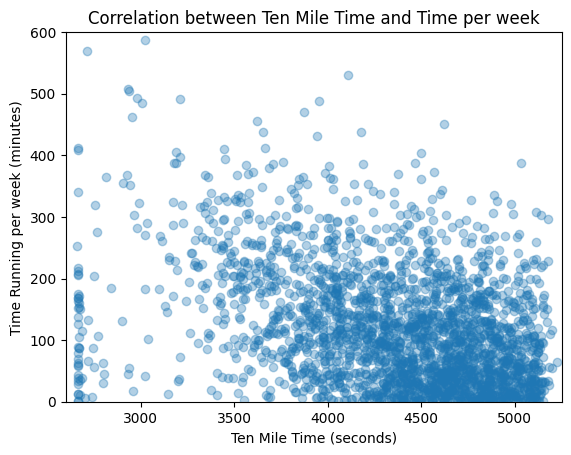

In [104]:
# Create scatter plot
coefficients = np.polyfit(sorted_df['Time in Seconds'], sorted_df['Time per week'], 1)
poly = np.poly1d(coefficients)


plt.scatter(sorted_df['Time in Seconds'], sorted_df['Time per week'], alpha=0.34)
# plt.plot(sorted_df['Time in Seconds'], poly(sorted_df['Time in Seconds']), color='black', linestyle='--', alpha=0.5, label=f'Line of Best Fit: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
plt.xlabel('Ten Mile Time (seconds)')
plt.ylabel('Time Running per week (minutes)')
plt.title('Correlation between Ten Mile Time and Time per week')
plt.xlim(2600,5250)
plt.ylim(0,600)
plt.show()

In [105]:
lap_data = pd.read_csv('main_files\combined_df.csv')
lap_data

,Name,Lap,Distance,Time,Pace,Elev,HR,GAP,Total_Time
0,Jack Rowe,1,1.0,298.000000,298,26.0,126.00,NaN,2813
1,Jack Rowe,2,1.0,290.000000,290,9.0,150.00,NaN,2813
2,Jack Rowe,3,1.0,285.000000,285,-1.0,172.00,NaN,2813
3,Jack Rowe,4,1.0,287.000000,287,-9.0,172.00,NaN,2813
4,Jack Rowe,5,1.0,268.000000,268,-3.0,181.00,NaN,2813
...,...,...,...,...,...,...,...,...,...
38983,Gem Ethel,6,1.0,621.806452,620,NaN,168.58,NaN,6169
38984,Gem Ethel,7,1.0,635.193548,633,NaN,168.54,NaN,6169
38985,Gem Ethel,8,1.0,642.967742,641,NaN,169.32,NaN,6169
38986,Gem Ethel,9,1.0,669.709677,667,NaN,168.92,NaN,6169


In [106]:
# Select only the 'Name' and 'Total_Time' columns
selected_columns = lap_data[['Name', 'Total_Time']].copy()

selected_columns.drop_duplicates(subset=['Name'], keep='first', inplace=True)

selected_columns.head(10)

,Name,Total_Time
0,Jack Rowe,2813
10,Andy Vernon,2900
20,Joshua Grace,2902
30,Dan Jarvis,2881
40,Ronnie Richmond,2961
50,George Beardmore,2976
60,Jonny Roberts,3005
70,Paul Navesey,2998
80,Scott Cousins,3003
90,Chris Thomas,3005


In [107]:
total_df = pd.merge(sorted_df,selected_columns, on='Name')

In [108]:
total_df

,Name,Distance,Time,Time in Seconds,Number of Activities,Distance Ran,Time Ran,Finishing Position,Time per week,Time in Minutes,Total_Time
0,Dave Kittle,10 mile,38:25,2305,147,953.3,8972,1463,172.538462,38.416667,4695
1,Jon Lawrence,10 mile,44:18,2658,323,1593.0,13140,1322,252.692308,44.300000,4644
2,Andy Vernon,10 mile,44:25,2665,48,333.7,2227,3,42.826923,44.416667,2900
3,Will Martin,10 mile,44:25,2665,16,62.4,656,942,12.615385,44.416667,4403
4,Matt Jones,10 mile,44:25,2665,246,1396.6,11027,236,212.057692,44.416667,4239
...,...,...,...,...,...,...,...,...,...,...,...
1258,Paul ‘Paz’ Harrison.,10 mile,1:26:24,5184,24,140.4,1373,2519,26.403846,86.400000,5187
1259,Mike Sharpe,10 mile,1:26:24,5184,64,319.4,2928,2570,56.307692,86.400000,5390
1260,Jordane Bates,10 mile,1:26:26,5186,108,605.9,5719,2569,109.980769,86.433333,5186
1261,Lisa Saunders,10 mile,1:26:39,5199,46,253.1,2874,2564,55.269231,86.650000,5198


In [109]:
# coefficients = np.polyfit(total_df['Time in Seconds'], total_df['Total_Time'], 1)
# poly = np.poly1d(coefficients)


# plt.scatter(total_df['Time in Seconds'], total_df['Total_Time'], alpha=0.34)
# plt.plot(total_df['Time in Seconds'], poly(total_df['Time in Seconds']), color='black', linestyle='--', alpha=0.5, label=f'Line of Best Fit: {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
# plt.xlabel('Ten Mile Time (seconds)')
# plt.ylabel('GreatSouthRun time (seconds)')
# plt.title('Correlation between Ten Mile Time and GSR time')
# plt.show()

In [110]:
# def convert_time_to_seconds(time_str_list):
#     for time_str in time_str_list:
#         if ':' in time_str:
#             time_parts = time_str.split(':')
#             if len(time_parts) == 2: # If there are two colons, assume format is mm:ss
#                 minutes, seconds = time_parts
#                 filtered_df['Time'][time_str] = int(minutes)*60 + int(seconds)
#             elif len(time_parts) == 3: # If there are three colons, assume format is hh:mm:ss
#                 hours, minutes, seconds = time_parts
#                 filtered_df['Time'][time_str] = int(hours)*3600 + int(minutes)*60 + int(seconds)
#         else:
#             time_str = eval(time_str)
#             filtered_df['Time'][time_str] = time_str
#     return 


# # yearly_activities['Time Ran'] = yearly_activities['Time Ran'].apply(lambda x: sum(int(i[:-1]) * (60 if i[-1] == 'h' else 1) for i in x.split()))
# filtered_df['Time'] = filtered_df['Time'].apply(lambda x: convert_time_to_seconds(x))

# filtered_df['Time'] = filtered_df['Time'].apply(lambda x: time_parts = x.split(':'))

In [111]:
total_strava_runs =  first_occurrences.copy()
total_strava_runs['Finishing Position'] = total_strava_runs.index + 1
total_strava_runs


,Name,Number of Activities,Distance Ran,Time Ran,Finishing Position
0,Jack Rowe,"2,144","16,430.7 mi",1832h 45m,1
1,Andy Vernon,"1,526","10,204.3 mi",1126h 25m,2
2,Joshua Grace,"2,758","16,859.0 mi",1872h 28m,3
3,Dan Jarvis,"4,037","19,301.4 mi",2133h 24m,4
4,Charlie Davis,"3,138","15,165.9 mi",1689h 21m,5
...,...,...,...,...,...
2568,Jordane Bates,462,"2,265.5 mi",365h 11m,2569
2569,Mike Sharpe,259,"1,371.5 mi",208h 13m,2570
2570,Kathryn Bailey 🐝,900,"4,941.1 mi",964h 3m,2571
2571,David Friend,"1,113","6,315.6 mi",1131h 9m,2572


In [112]:
yearly_activities

,Name,Number of Activities,Distance Ran,Time Ran,Finishing Position,Time per week
0,Jack Rowe,565,4414.5,29625,1,569.711538
1,Jake Smith,171,1157.2,7105,2,136.634615
2,Andy Vernon,48,333.7,2227,3,42.826923
3,Joshua Grace,419,2752.4,18491,4,355.596154
4,Dan Jarvis,193,992.2,6796,5,130.692308
...,...,...,...,...,...,...
2568,Jordane Bates,108,605.9,5719,2569,109.980769
2569,Mike Sharpe,64,319.4,2928,2570,56.307692
2570,Kathryn Bailey 🐝,82,424.7,4196,2571,80.692308
2571,David Friend,124,619.3,7831,2572,150.596154


In [113]:
lap_data

,Name,Lap,Distance,Time,Pace,Elev,HR,GAP,Total_Time
0,Jack Rowe,1,1.0,298.000000,298,26.0,126.00,NaN,2813
1,Jack Rowe,2,1.0,290.000000,290,9.0,150.00,NaN,2813
2,Jack Rowe,3,1.0,285.000000,285,-1.0,172.00,NaN,2813
3,Jack Rowe,4,1.0,287.000000,287,-9.0,172.00,NaN,2813
4,Jack Rowe,5,1.0,268.000000,268,-3.0,181.00,NaN,2813
...,...,...,...,...,...,...,...,...,...
38983,Gem Ethel,6,1.0,621.806452,620,NaN,168.58,NaN,6169
38984,Gem Ethel,7,1.0,635.193548,633,NaN,168.54,NaN,6169
38985,Gem Ethel,8,1.0,642.967742,641,NaN,169.32,NaN,6169
38986,Gem Ethel,9,1.0,669.709677,667,NaN,168.92,NaN,6169


In [114]:
merged_df

,Name,Distance,Time,Time in Seconds,Number of Activities,Distance Ran,Time Ran,Finishing Position,Time per week
0,Aaron Benney,5k,16:23,983,212,1513.3,11354,135,218.346154
1,Aaron Benney,10k,33:35,2015,212,1513.3,11354,135,218.346154
2,Aaron Benney,10 mile,55:08,3308,212,1513.3,11354,135,218.346154
3,Aaron Burley,5k,22:04,1324,28,102.0,843,1383,16.211538
4,Aaron Burley,10k,46:35,2795,28,102.0,843,1383,16.211538
...,...,...,...,...,...,...,...,...,...
7351,🌱 Luc Jolly 🌱,10k,26:19,1579,501,2958.1,21287,23,409.365385
7352,🌱 Luc Jolly 🌱,10 mile,44:25,2665,501,2958.1,21287,23,409.365385
7353,💕 Emma Neal 💕,5k,22:44,1364,23,183.3,1952,2487,37.538462
7354,💕 Emma Neal 💕,10k,48:32,2912,23,183.3,1952,2487,37.538462


In [115]:
second_occurrences

,Name,Number of Activities,Distance Ran,Time Ran,Finishing Position,Time per week
0,Jack Rowe,565,4414.5,29625,1,569.711538
1,Jake Smith,171,1157.2,7105,2,136.634615
2,Andy Vernon,48,333.7,2227,3,42.826923
3,Joshua Grace,419,2752.4,18491,4,355.596154
4,Dan Jarvis,193,992.2,6796,5,130.692308
...,...,...,...,...,...,...
2568,Jordane Bates,108,605.9,5719,2569,109.980769
2569,Mike Sharpe,64,319.4,2928,2570,56.307692
2570,Kathryn Bailey 🐝,82,424.7,4196,2571,80.692308
2571,David Friend,124,619.3,7831,2572,150.596154


In [116]:
sorted_10mile = sorted_df.copy()
sorted_10mile.drop(sorted_10mile.loc[sorted_10mile['Name'] == 'Tess Howlett'].index, inplace=True)
sorted_10mile.drop(sorted_10mile.loc[sorted_10mile['Name'] == 'Justin Olley (LRR / Sotonia CC)'].index, inplace=True)
sorted_10mile.drop(sorted_10mile.loc[sorted_10mile['Name'] == 'Dave Kittle'].index, inplace=True)
sorted_10mile.drop(sorted_10mile.loc[sorted_10mile['Name'] == 'Chara Balasubramaniam'].index, inplace=True)
sorted_10mile





,Name,Distance,Time,Time in Seconds,Number of Activities,Distance Ran,Time Ran,Finishing Position,Time per week,Time in Minutes
3296,Jon Lawrence,10 mile,44:18,2658,323,1593.0,13140,1322,252.692308,44.300000
7127,chris hall,10 mile,44:25,2665,100,537.0,4598,509,88.423077,44.416667
461,Andy Vernon,10 mile,44:25,2665,48,333.7,2227,3,42.826923,44.416667
7067,Will Martin,10 mile,44:25,2665,16,62.4,656,942,12.615385,44.416667
5816,Robert Hanmore,10 mile,44:25,2665,135,466.0,3639,1414,69.980769,44.416667
...,...,...,...,...,...,...,...,...,...,...
3437,Julie Thomas,10 mile,1:26:39,5199,120,642.6,6070,2161,116.730769,86.650000
2084,Gary Bennett,10 mile,1:27:06,5226,54,385.3,3394,2197,65.269231,87.100000
302,Andrew Bradley,10 mile,1:28:31,5311,66,230.4,2347,2015,45.134615,88.516667
3719,Leanne Rule,10 mile,1:32:05,5525,47,178.5,1645,1805,31.634615,92.083333


In [117]:

bins = [40,50,60,70,80,90,100]

labels = ['40-50','50-60','60-70','70-80','80-90','90-100']

sorted_10mile['Binned_Time_Mins'] = pd.cut(sorted_10mile['Time in Minutes'], bins=bins,labels=labels)

sorted_10mile


,Name,Distance,Time,Time in Seconds,Number of Activities,Distance Ran,Time Ran,Finishing Position,Time per week,Time in Minutes,Binned_Time_Mins
3296,Jon Lawrence,10 mile,44:18,2658,323,1593.0,13140,1322,252.692308,44.300000,40-50
7127,chris hall,10 mile,44:25,2665,100,537.0,4598,509,88.423077,44.416667,40-50
461,Andy Vernon,10 mile,44:25,2665,48,333.7,2227,3,42.826923,44.416667,40-50
7067,Will Martin,10 mile,44:25,2665,16,62.4,656,942,12.615385,44.416667,40-50
5816,Robert Hanmore,10 mile,44:25,2665,135,466.0,3639,1414,69.980769,44.416667,40-50
...,...,...,...,...,...,...,...,...,...,...,...
3437,Julie Thomas,10 mile,1:26:39,5199,120,642.6,6070,2161,116.730769,86.650000,80-90
2084,Gary Bennett,10 mile,1:27:06,5226,54,385.3,3394,2197,65.269231,87.100000,80-90
302,Andrew Bradley,10 mile,1:28:31,5311,66,230.4,2347,2015,45.134615,88.516667,80-90
3719,Leanne Rule,10 mile,1:32:05,5525,47,178.5,1645,1805,31.634615,92.083333,90-100


In [118]:
sorted_10mile['Distance per week'] = sorted_10mile['Distance Ran']/52

In [119]:
sorted_10mile.drop(sorted_10mile.loc[sorted_10mile['Distance Ran'] < 1].index, inplace=True)

<Figure size 1000x600 with 0 Axes>

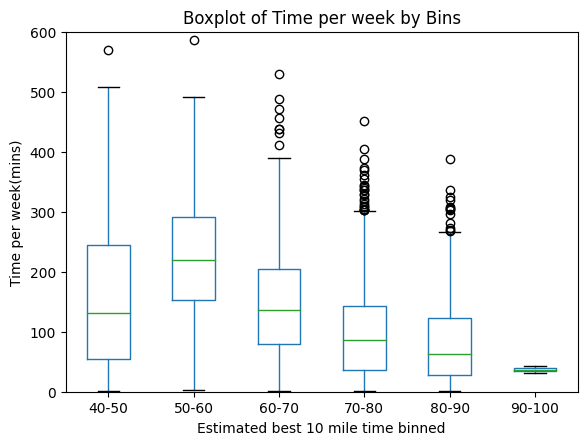

In [120]:
plt.figure(figsize=(10, 6))
boxplot = sorted_10mile.boxplot(column='Time per week', by='Binned_Time_Mins', grid=False)

# Customize the plot
plt.title('Boxplot of Time per week by Bins')
plt.suptitle('')  # Remove default title
plt.xlabel('Estimated best 10 mile time binned')
plt.ylabel('Time per week(mins)')
plt.ylim(0,600)
# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

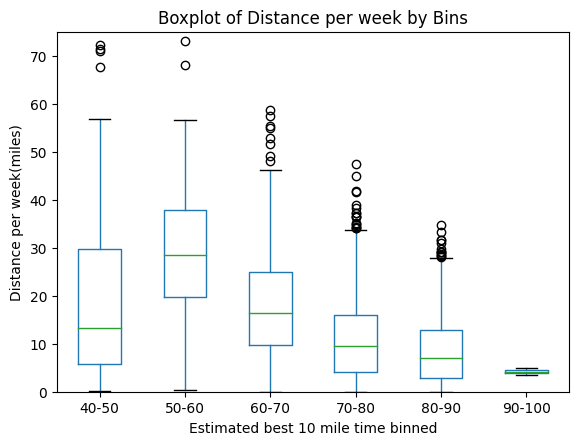

In [121]:
plt.figure(figsize=(10, 6))
boxplot = sorted_10mile.boxplot(column='Distance per week', by='Binned_Time_Mins', grid=False)

# Customize the plot
plt.title('Boxplot of Distance per week by Bins')
plt.suptitle('')  # Remove default title
plt.xlabel('Estimated best 10 mile time binned')
plt.ylabel('Distance per week(miles)')
# plt.yscale('log')
plt.ylim(0,75)
# Show the plot
plt.show()

In [122]:
yearly_activities.drop(yearly_activities.loc[yearly_activities['Number of Activities'] == 0].index, inplace=True)

In [123]:
total_df

,Name,Distance,Time,Time in Seconds,Number of Activities,Distance Ran,Time Ran,Finishing Position,Time per week,Time in Minutes,Total_Time
0,Dave Kittle,10 mile,38:25,2305,147,953.3,8972,1463,172.538462,38.416667,4695
1,Jon Lawrence,10 mile,44:18,2658,323,1593.0,13140,1322,252.692308,44.300000,4644
2,Andy Vernon,10 mile,44:25,2665,48,333.7,2227,3,42.826923,44.416667,2900
3,Will Martin,10 mile,44:25,2665,16,62.4,656,942,12.615385,44.416667,4403
4,Matt Jones,10 mile,44:25,2665,246,1396.6,11027,236,212.057692,44.416667,4239
...,...,...,...,...,...,...,...,...,...,...,...
1258,Paul ‘Paz’ Harrison.,10 mile,1:26:24,5184,24,140.4,1373,2519,26.403846,86.400000,5187
1259,Mike Sharpe,10 mile,1:26:24,5184,64,319.4,2928,2570,56.307692,86.400000,5390
1260,Jordane Bates,10 mile,1:26:26,5186,108,605.9,5719,2569,109.980769,86.433333,5186
1261,Lisa Saunders,10 mile,1:26:39,5199,46,253.1,2874,2564,55.269231,86.650000,5198


In [124]:
yearly_activities

,Name,Number of Activities,Distance Ran,Time Ran,Finishing Position,Time per week
0,Jack Rowe,565,4414.5,29625,1,569.711538
1,Jake Smith,171,1157.2,7105,2,136.634615
2,Andy Vernon,48,333.7,2227,3,42.826923
3,Joshua Grace,419,2752.4,18491,4,355.596154
4,Dan Jarvis,193,992.2,6796,5,130.692308
...,...,...,...,...,...,...
2568,Jordane Bates,108,605.9,5719,2569,109.980769
2569,Mike Sharpe,64,319.4,2928,2570,56.307692
2570,Kathryn Bailey 🐝,82,424.7,4196,2571,80.692308
2571,David Friend,124,619.3,7831,2572,150.596154
